In [1]:
## all imports

import numpy as np
import pandas as pd
import urllib
import bs4
import time
import re # regular expressions

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


## Reading the data

In [4]:
homeURL = "https://www.iplt20.com"

In [5]:
html = urllib.request.urlopen(homeURL).read()
bs_tree = bs4.BeautifulSoup(html)

In [11]:
hrefs = [ homeURL + a.get('href') for a in bs_tree.findAll('a') for s in ['matches' , 'points-table', 'stats','teams','news','match','archive' ] if a.get('href') is not None and s in a.get('href')]
hrefs

['https://www.iplt20.com/matches/results/men/2020',
 'https://www.iplt20.com/matches/results/men/2020',
 'https://www.iplt20.com/points-table',
 'https://www.iplt20.com/stats/2020',
 'https://www.iplt20.com/stats/all-time',
 'https://www.iplt20.com/teams/chennai-super-kings',
 'https://www.iplt20.com/teams/delhi-capitals',
 'https://www.iplt20.com/teams/kings-xi-punjab',
 'https://www.iplt20.com/teams/kolkata-knight-riders',
 'https://www.iplt20.com/teams/mumbai-indians',
 'https://www.iplt20.com/teams/rajasthan-royals',
 'https://www.iplt20.com/teams/royal-challengers-bangalore',
 'https://www.iplt20.com/teams/sunrisers-hyderabad',
 'https://www.iplt20.com/news',
 'https://www.iplt20.com/news/announcements',
 'https://www.iplt20.com/news/match-reports',
 'https://www.iplt20.com/news/match-reports',
 'https://www.iplt20.com/news/features-and-interviews',
 'https://www.iplt20.commatches/results/women/2020',
 'https://www.iplt20.commatches/results/women/2020',
 'https://www.iplt20.comhtt

In [12]:
hrefs.append(homeURL)

In [9]:
teams = {'Chennai Super Kings':0,
 'Delhi Capitals':0,
 'Kings XI Punjab':0,
 'Kolkata Knight Riders':0,
 'Mumbai Indians':0,
 'Rajasthan Royals':0,
 'Royal Challengers Bangalore':0,
 'Sunrisers Hyderabad':0}

In [13]:
for link in hrefs:
    print(f"Link: {link}")
    try:
        html = urllib.request.urlopen(link).read().decode('UTF-8')
        
    except Exception as e:
        print(f"Exception: {str(e)}")
        
    for team in teams.keys():
        teams[team] += html.count(team)

Link: https://www.iplt20.com/matches/results/men/2020
Link: https://www.iplt20.com/matches/results/men/2020
Link: https://www.iplt20.com/points-table
Link: https://www.iplt20.com/stats/2020
Link: https://www.iplt20.com/stats/all-time
Link: https://www.iplt20.com/teams/chennai-super-kings
Link: https://www.iplt20.com/teams/delhi-capitals
Link: https://www.iplt20.com/teams/kings-xi-punjab
Link: https://www.iplt20.com/teams/kolkata-knight-riders
Link: https://www.iplt20.com/teams/mumbai-indians
Link: https://www.iplt20.com/teams/rajasthan-royals
Link: https://www.iplt20.com/teams/royal-challengers-bangalore
Link: https://www.iplt20.com/teams/sunrisers-hyderabad
Link: https://www.iplt20.com/news
Link: https://www.iplt20.com/news/announcements
Link: https://www.iplt20.com/news/match-reports
Link: https://www.iplt20.com/news/match-reports
Link: https://www.iplt20.com/news/features-and-interviews
Link: https://www.iplt20.commatches/results/women/2020
Exception: <urlopen error [Errno 11001] ge

Link: https://www.iplt20.com/video/224781/m53-csk-vs-kxip-match-highlights?tagNames=indian-premier-league&references=CRICKET_TOURNAMENT:18790&viewCountWindowSeconds=604800
Link: https://www.iplt20.com/video/227475/q2-dc-vs-srh-match-highlights?tagNames=indian-premier-league&references=CRICKET_TOURNAMENT:18790&viewCountWindowSeconds=604800
Link: https://www.iplt20.com/video/223177/m48-mi-vs-rcb-match-highlights?tagNames=indian-premier-league&references=CRICKET_TOURNAMENT:18790&viewCountWindowSeconds=604800
Link: https://www.iplt20.com/video/219556/m36-mi-vs-kxip-match-highlights?tagNames=indian-premier-league&references=CRICKET_TOURNAMENT:18790&viewCountWindowSeconds=604800
Link: https://www.iplt20.com/video/223565/m49-csk-vs-kkr-match-highlights?tagNames=indian-premier-league&references=CRICKET_TOURNAMENT:18790&viewCountWindowSeconds=604800
Link: https://www.iplt20.com/video/225131/m54-kkr-vs-rr-match-highlights?tagNames=indian-premier-league&references=CRICKET_TOURNAMENT:18790&viewCou

In [14]:
teams

{'Chennai Super Kings': 2376,
 'Delhi Capitals': 2761,
 'Kings XI Punjab': 2343,
 'Kolkata Knight Riders': 2420,
 'Mumbai Indians': 3059,
 'Rajasthan Royals': 2312,
 'Royal Challengers Bangalore': 2475,
 'Sunrisers Hyderabad': 2411}

In [15]:
teams = {k: v for k, v in sorted(teams.items(), key=lambda item: item[1], reverse=True)}
teams

{'Mumbai Indians': 3059,
 'Delhi Capitals': 2761,
 'Royal Challengers Bangalore': 2475,
 'Kolkata Knight Riders': 2420,
 'Sunrisers Hyderabad': 2411,
 'Chennai Super Kings': 2376,
 'Kings XI Punjab': 2343,
 'Rajasthan Royals': 2312}

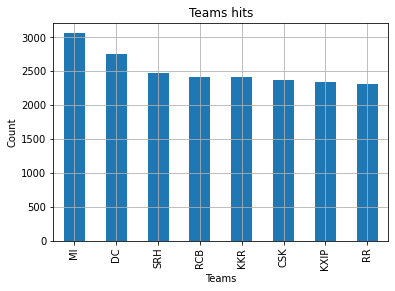

In [16]:
pseries = pd.Series(teams)
#pseries.sort(ascending=False)

pseries.plot(kind = 'bar')
## set the title to Score Comparison
plt.title('Teams hits')
plt.xlabel('Teams')
plt.ylabel('Count')
plt.xticks(np.arange(8),['MI', 'DC', 'SRH', 'RCB', 'KKR', 'CSK', 'KXIP', 'RR'])
plt.grid(True)
plt.show()